In [ ]:
import datetime

import numpy as np
import pandas as pd
from metric import apk, mapk
from utils import plot_images, train_valid_split

transactions = pd.read_pickle('./input/transformed/transactions_train.pkl')[['t_dat', 'user', 'item']]

transactions_train, transactions_valid = train_valid_split(transactions, datetime.date(2020, 9, 16), 21)
valid = transactions_valid.groupby('user')['item'].apply(list).reset_index()
train = transactions_train.groupby('user')['item'].apply(list).reset_index()

0


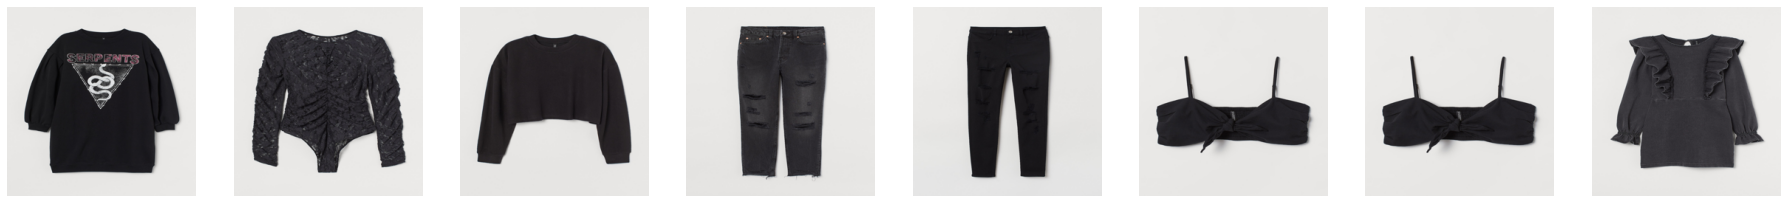

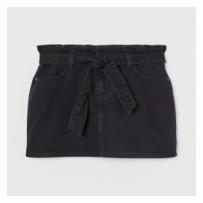

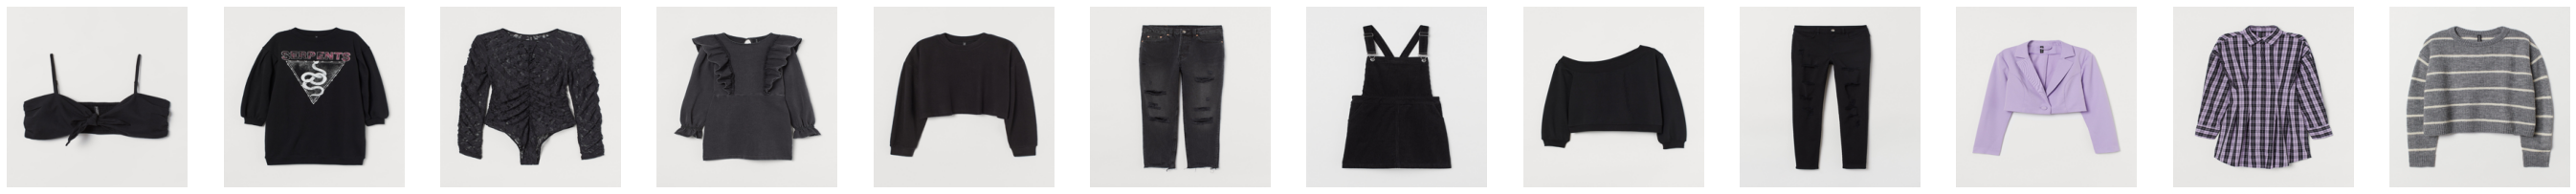

1


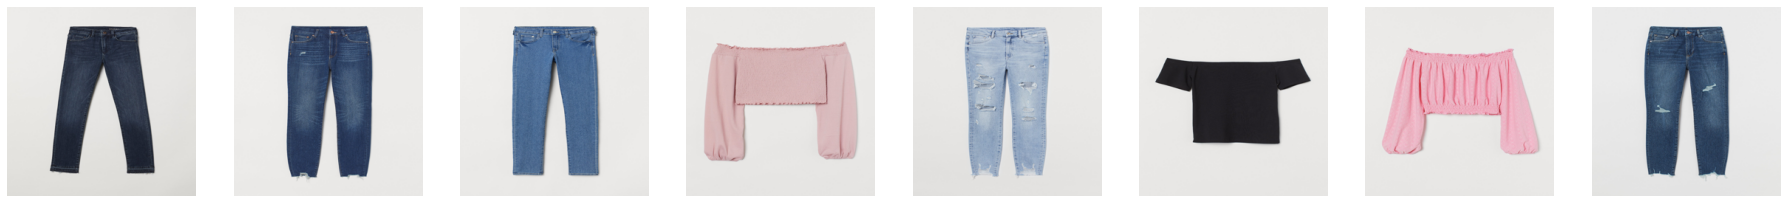

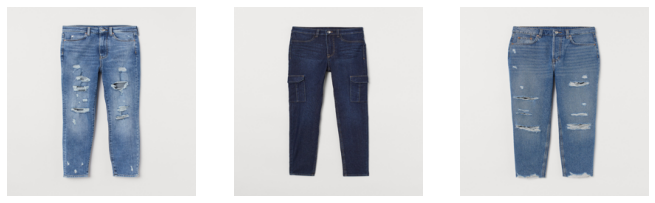

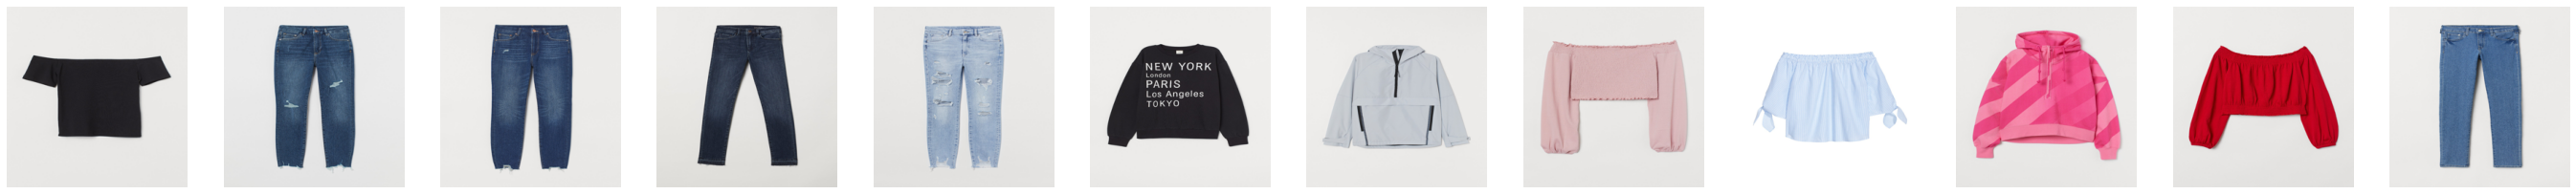

2


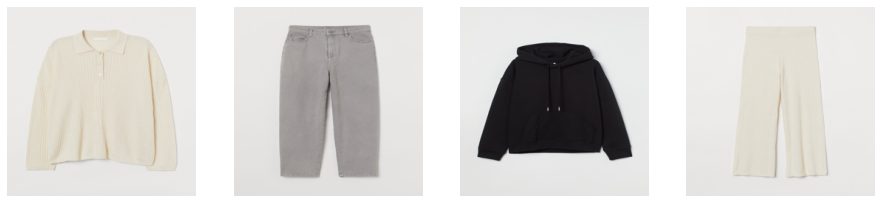

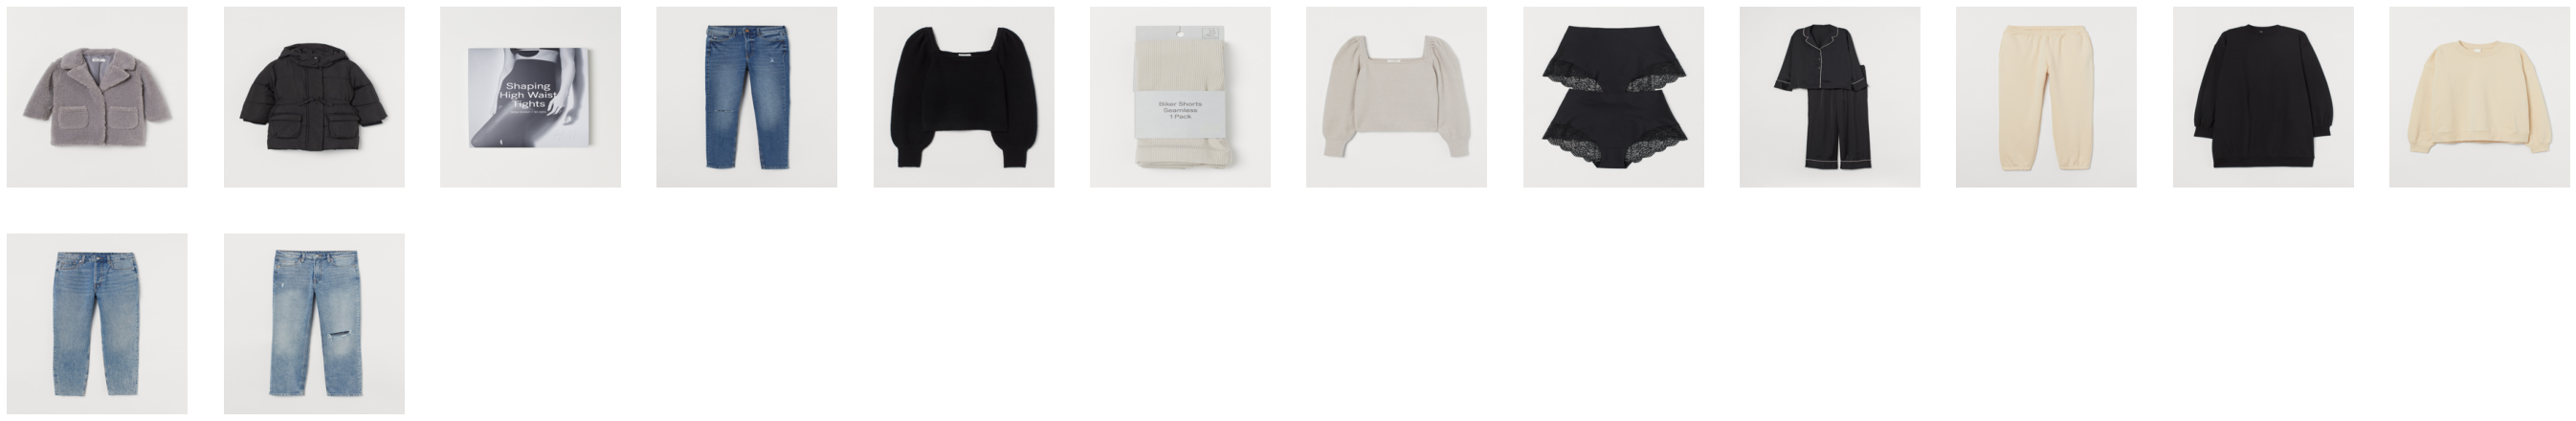

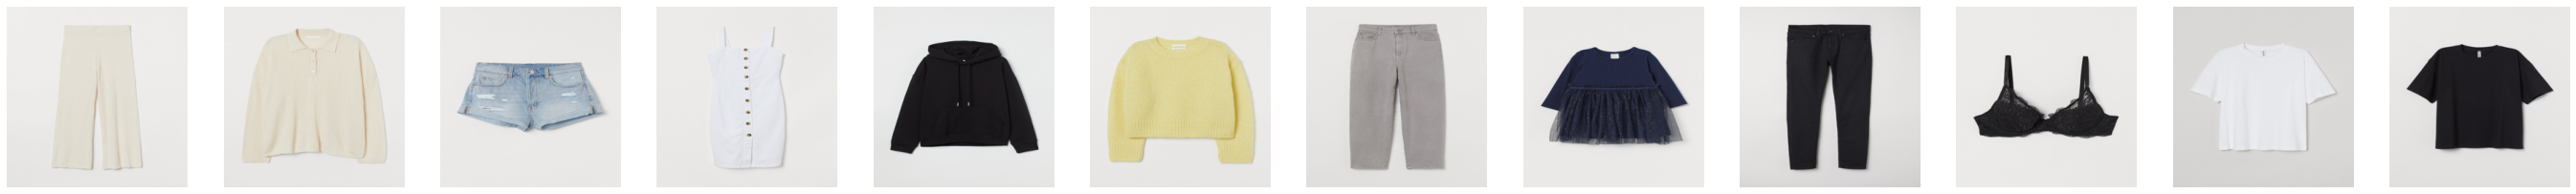

3


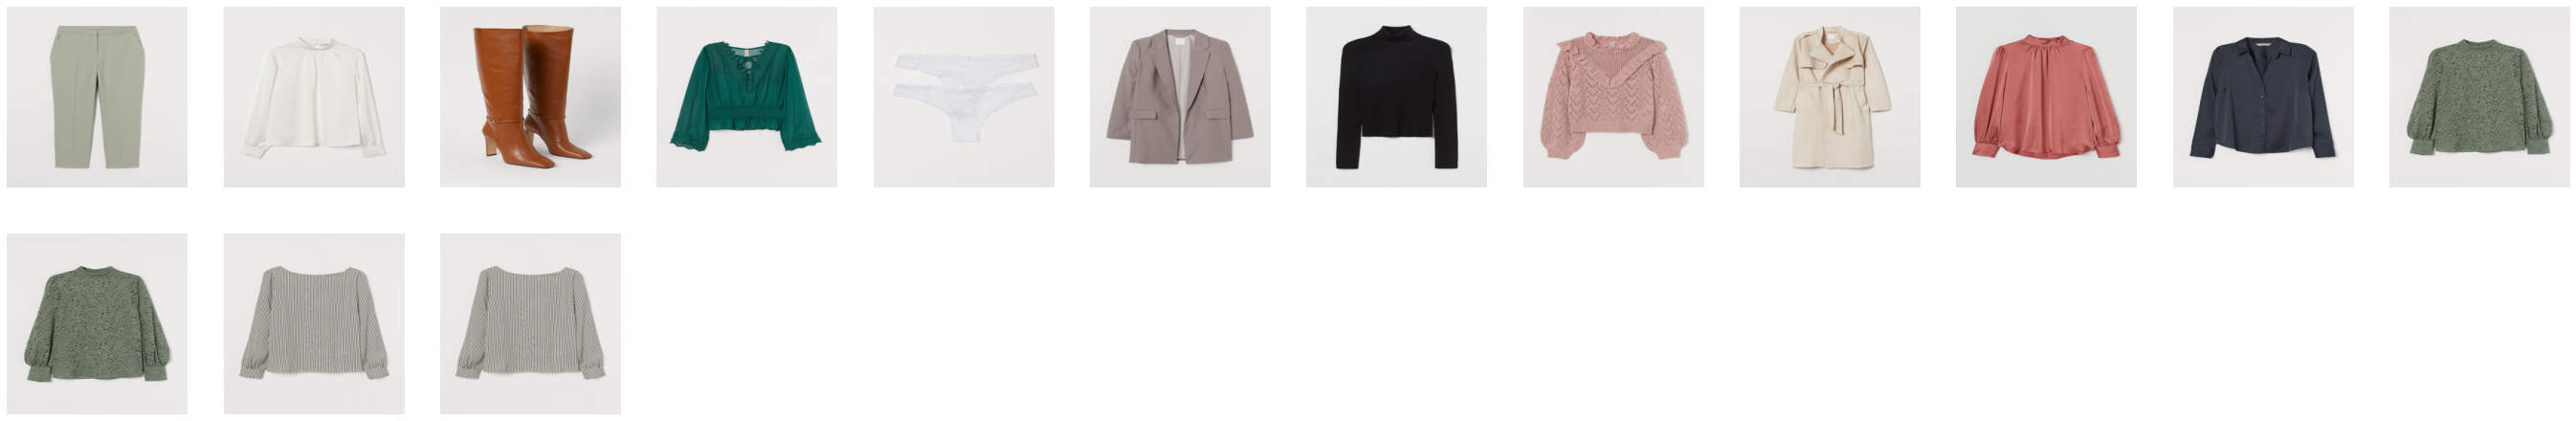

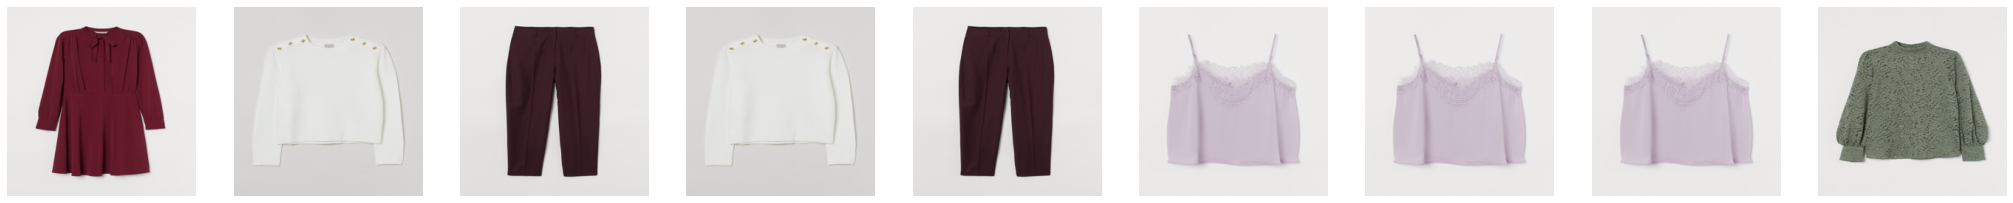

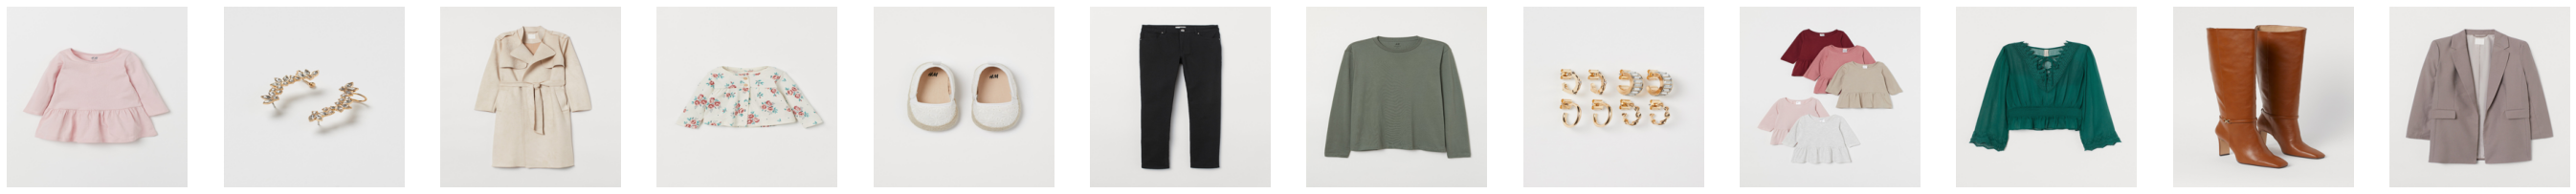

4


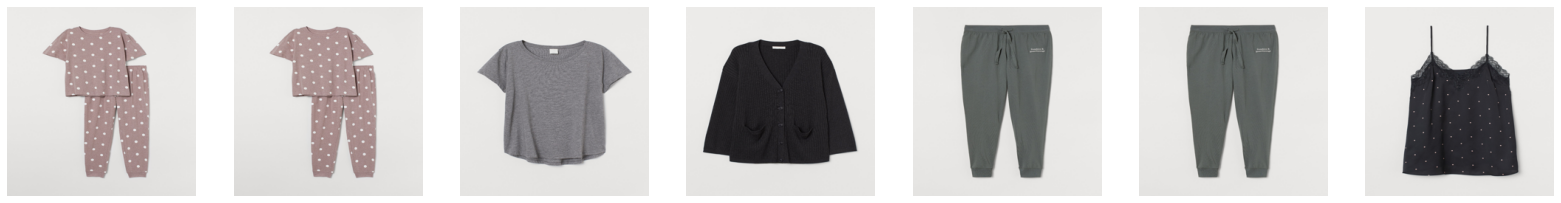

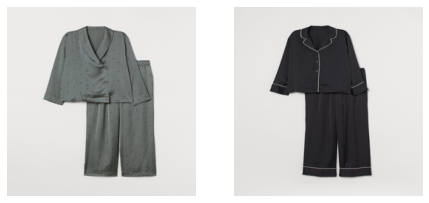

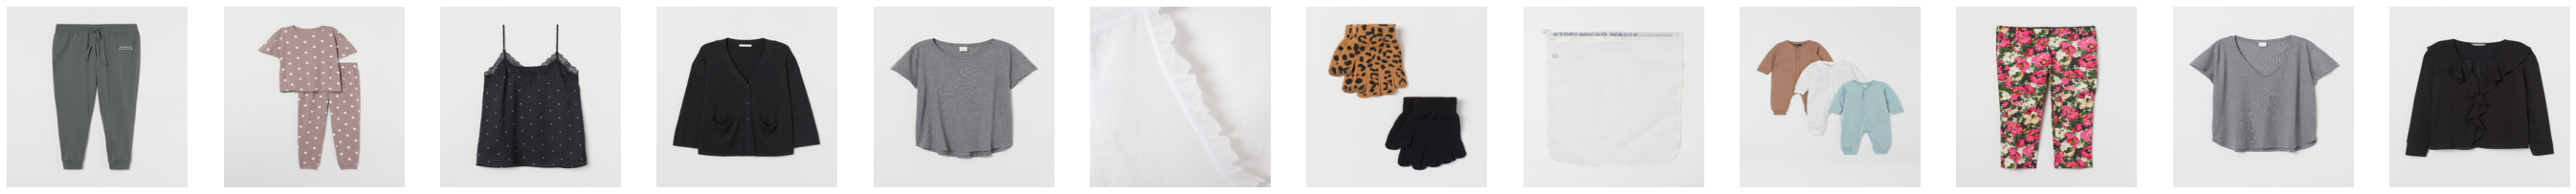

5


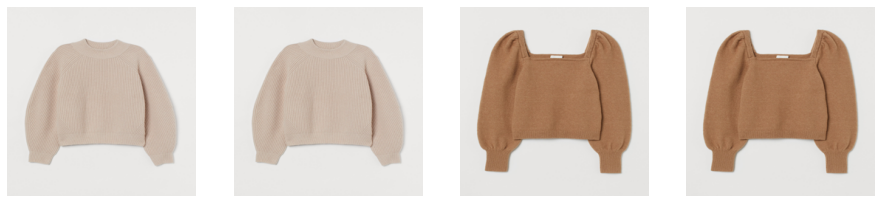

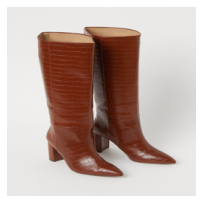

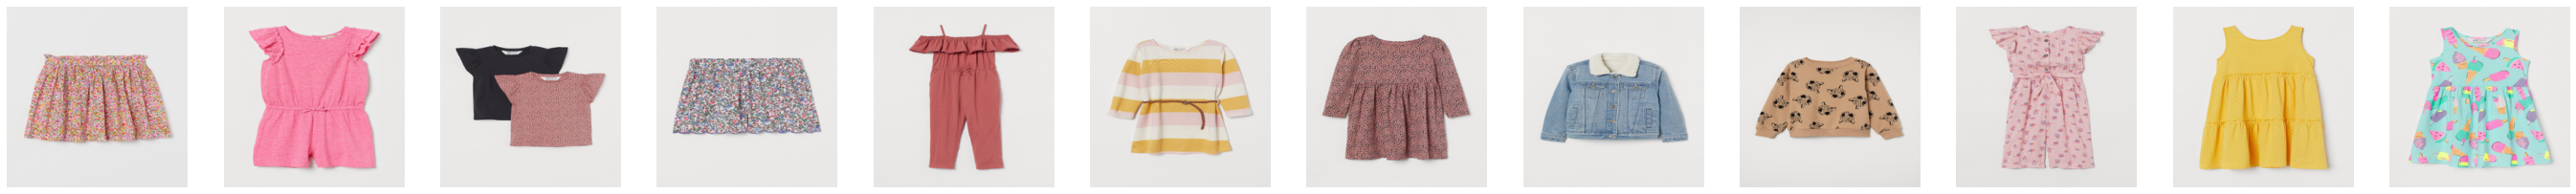

6


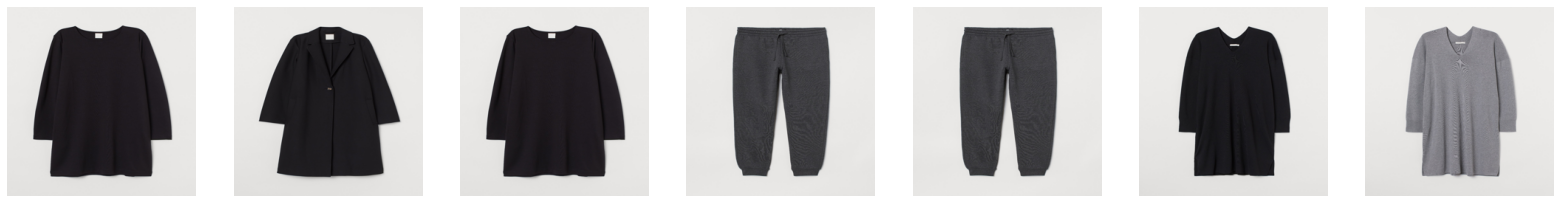

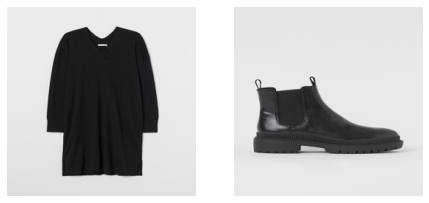

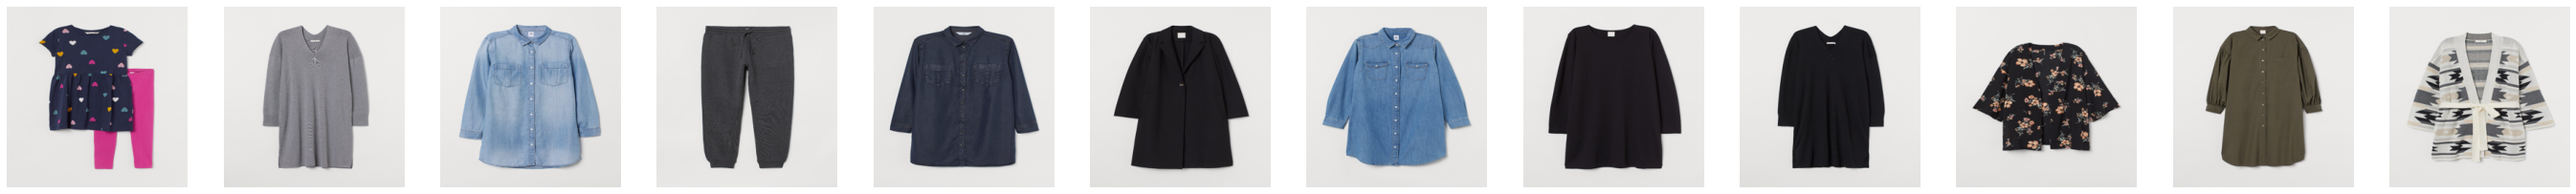

7


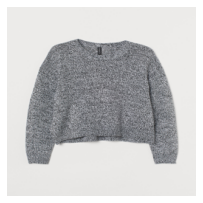

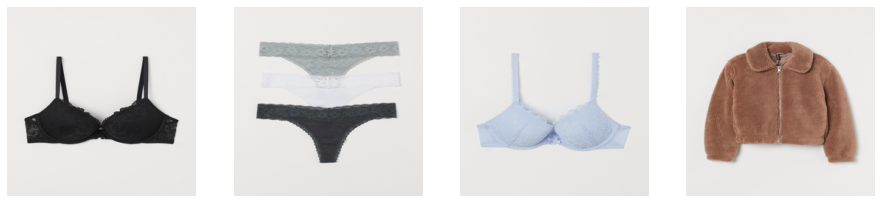

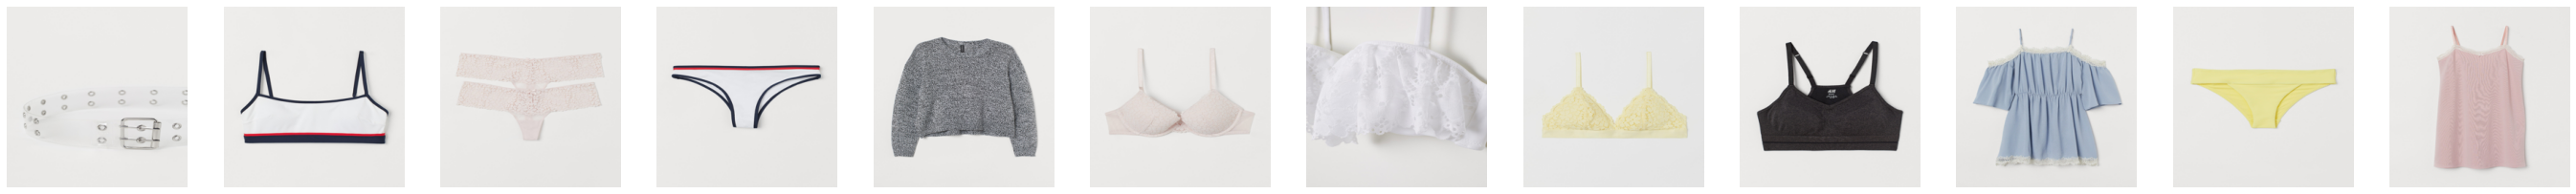

8


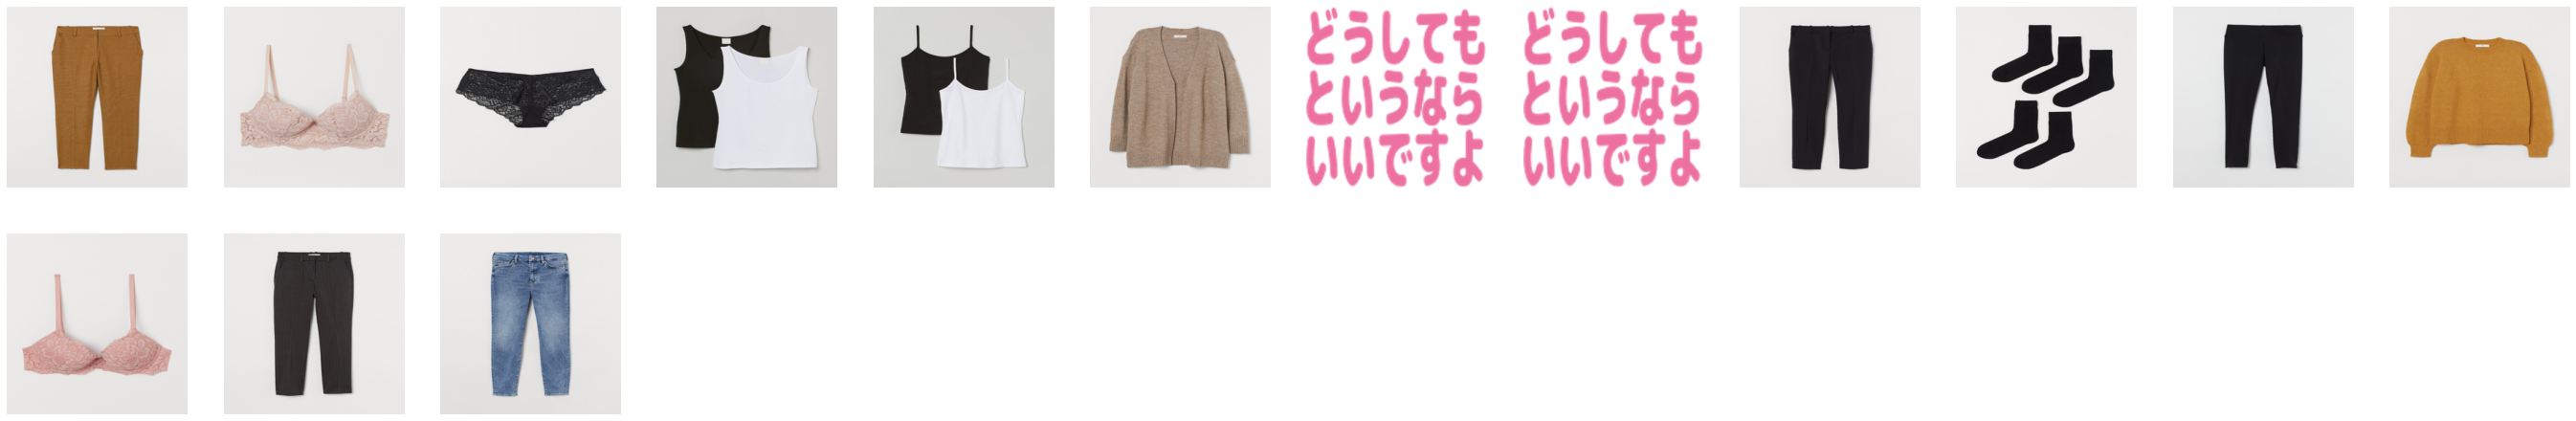

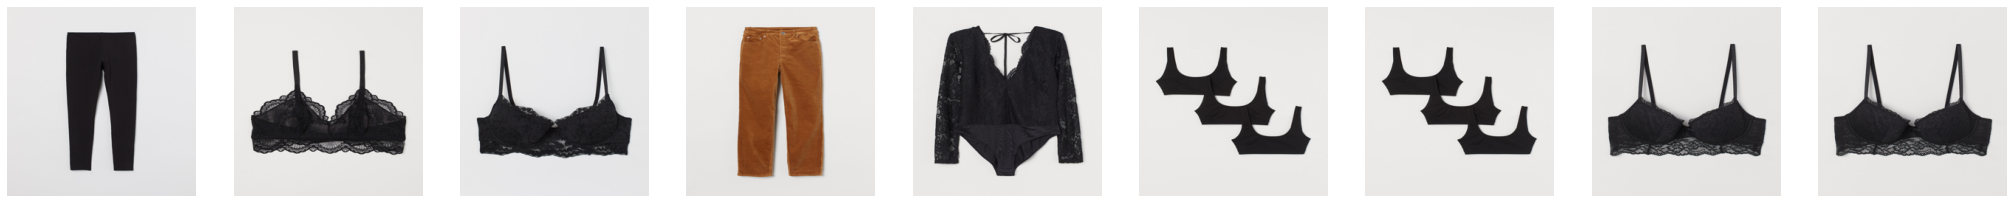

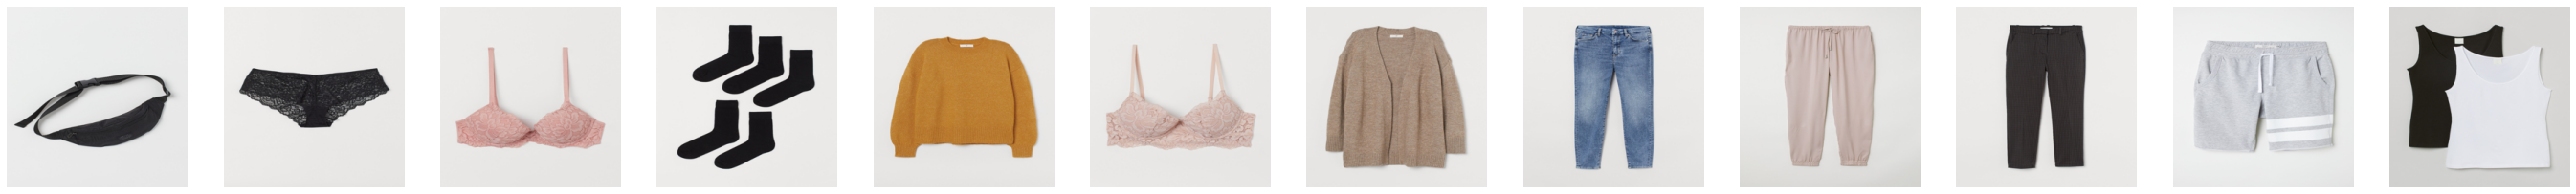

9


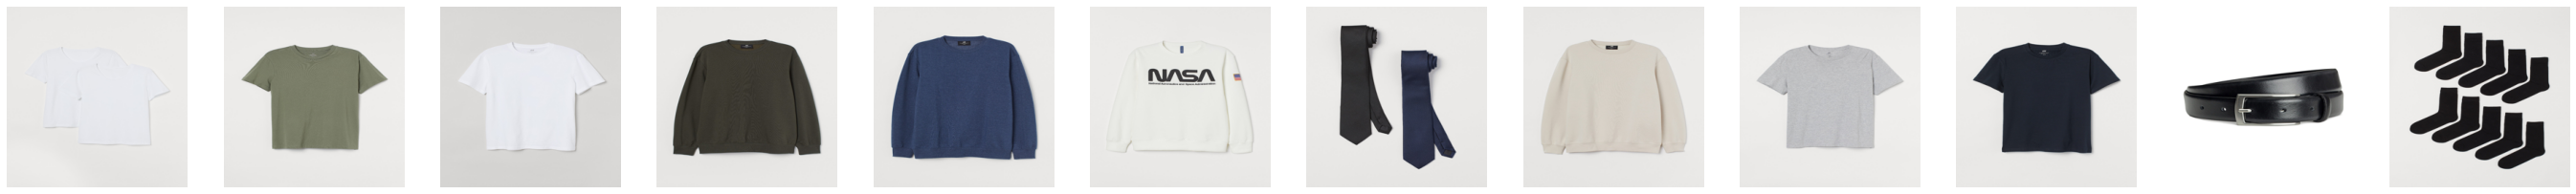

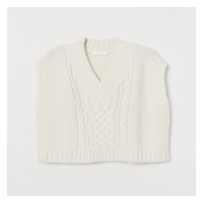

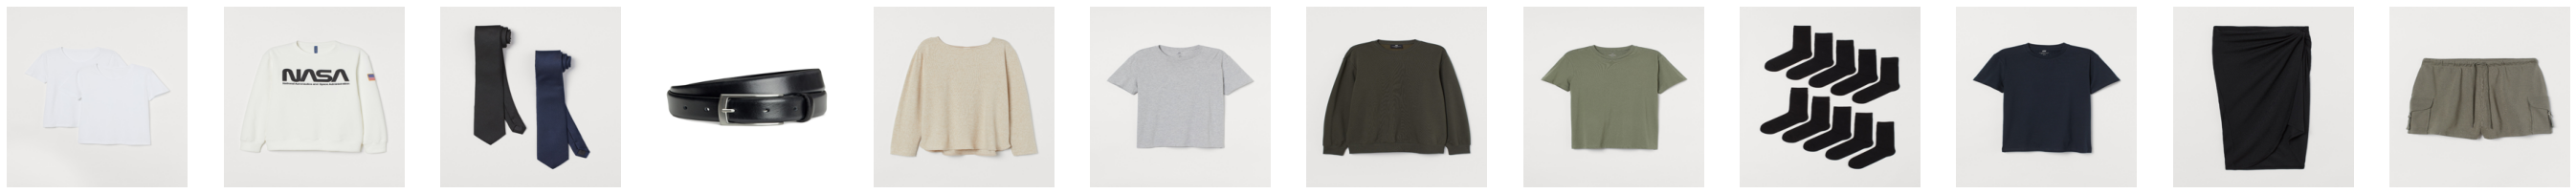

In [2]:
pred = pd.read_csv('./models/output/item_item.csv')
pred['item'] = pred['item'].apply(lambda x: list(map(int, x.split(' '))))

valid = valid.rename(columns={'item': 'item_valid'})
train = train.rename(columns={'item': 'item_train'})
pred = pred.rename(columns={'item': 'item_pred'})

merged = valid.merge(train, on='user').merge(pred, on='user')

for idx, row in merged.head(10).iterrows():
    print(idx)
    plot_images(row.item_train)
    plot_images(row.item_valid)
    plot_images(row.item_pred)